<a href="https://colab.research.google.com/github/prashver/optical-character-recognition/blob/main/Text_from_image_using_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from PIL import Image, ImageDraw

In [3]:
image_path = "/content/sample_data/test_image.png"
image = cv2.imread(image_path)

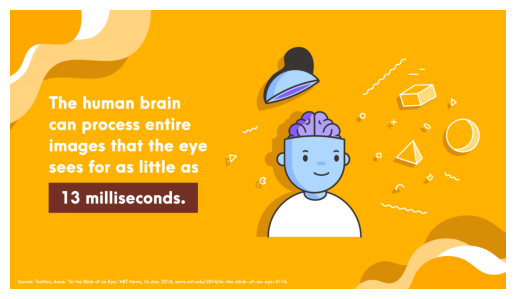

In [4]:
plt.imshow(image)
plt.axis('off')
plt.show()

# EasyOCR method

In [5]:
!pip install easyocr -q

In [6]:
import easyocr

reader = easyocr.Reader(['en','hi'], gpu=False)

In [7]:
results = reader.readtext(np.array(image))

In [8]:
results

[([[96, 214], [446, 214], [446, 266], [96, 266]],
  'The human brain',
  0.55593285928835),
 ([[97, 281], [175, 281], [175, 317], [97, 317]], 'can', 0.9019361734390259),
 ([[178, 272], [472, 272], [472, 327], [178, 327]],
  'process entire',
  0.8303348278967374),
 ([[92, 326], [516, 326], [516, 383], [92, 383]],
  'images that the eye',
  0.8300899889919406),
 ([[97, 383], [491, 383], [491, 427], [97, 427]],
  'sees for as little as',
  0.6733695486816297),
 ([[128, 460], [458, 460], [458, 508], [128, 508]],
  '१३ milliseconds.',
  0.7984737056924421),
 ([[19, 695], [143, 695], [143, 709], [19, 709]],
  'Soulices Iralfon Anine',
  0.3338015786507274),
 ([[147, 693], [717, 693], [717, 709], [147, 709]],
  '"In the Blink of an Eye."MIT News १४ Jan. २०१४ news mit.edu/२o1 4lin-the -blink-of-an-eye-01 16.',
  0.16843683145287625)]

In [9]:
img_df = pd.DataFrame(results, columns=['bbox','text','prediction_conf'])

In [10]:
img_df.head(10)

,bbox,text,prediction_conf
0,"[[96, 214], [446, 214], [446, 266], [96, 266]]",The human brain,0.555933
1,"[[97, 281], [175, 281], [175, 317], [97, 317]]",can,0.901936
2,"[[178, 272], [472, 272], [472, 327], [178, 327]]",process entire,0.830335
3,"[[92, 326], [516, 326], [516, 383], [92, 383]]",images that the eye,0.830090
4,"[[97, 383], [491, 383], [491, 427], [97, 427]]",sees for as little as,0.673370
5,"[[128, 460], [458, 460], [458, 508], [128, 508]]",१३ milliseconds.,0.798474
6,"[[19, 695], [143, 695], [143, 709], [19, 709]]",Soulices Iralfon Anine,0.333802
7,"[[147, 693], [717, 693], [717, 709], [147, 709]]","""In the Blink of an Eye.""MIT News १४ Jan. २०१४...",0.168437


In [11]:
img_df['text']

0                                      The human brain
1                                                  can
2                                       process entire
3                                  images that the eye
4                                sees for as little as
5                                     १३ milliseconds.
6                               Soulices Iralfon Anine
7    "In the Blink of an Eye."MIT News १४ Jan. २०१४...
Name: text, dtype: object

In [12]:
top_left = tuple(results[0][0][0])
bottom_right = tuple(results[0][0][2])

text = results[0][1]

font = cv2.FONT_HERSHEY_COMPLEX

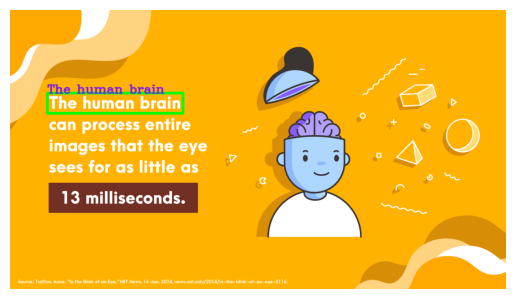

In [13]:
img = cv2.rectangle(image, top_left,bottom_right,(0,255,0),5)
img = cv2.putText(img, text, top_left, font, 1, (125,29,241),2,cv2.LINE_AA)

plt.imshow(img)
plt.axis('off')
plt.show()

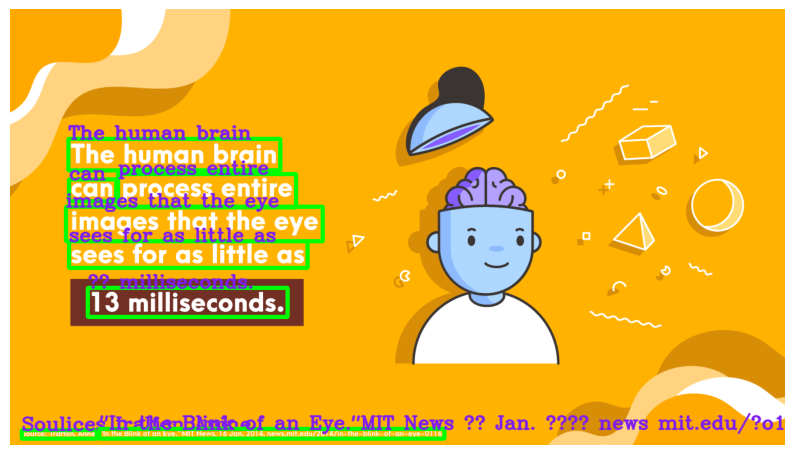

In [14]:
for detection in results:
    top_left = tuple([int(val)for val in detection[0][0]])
    bottom_right = tuple([int(val)for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_COMPLEX

    text_size = cv2.getTextSize(text, font, 1, 2)[0]
    text_position = (top_left[0] + 10, top_left[1] + text_size[1] + 10)  # Adjust the position as needed

    image = cv2.rectangle(image, top_left,bottom_right,(0,255,0),5)
    image = cv2.putText(image, text, top_left, font,1,(125,29,241),2,cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()